<a href="https://colab.research.google.com/github/Jeetesh-KumarM/CAPSTONE-PROJECT-3-CLASSIFICATION/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Coronavirus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

We have been provided with Coronavirus Tweet Sentiment Analysis dataset for the year 2020 which includes several factors like Location, OriginalTweet, TweetAt, Sentiment and etc.The process followed:
1. Analysed the data- The number of rows and columns it had,type of the features presented,the kind of data each particular feature had,checked for duplicated or missing values.
2. Data manipulation- Checked for outliers and null values and fiixed it with the necessary operations.
3. Data Visualiztion - plotted various graphs and like Location,Monthly tweet,Type of Sentiment,Tweeted at, Word Cloud etc. charts to find out their affect on the Sentiment.Also plotted heatmap to find the correlation between different features.
4. Data Pre-processing and feature selection- Dropped the unnecessary columns and rows.Performed Text Data Processing like contraction,removing urls,punctuations and stopwords.Also performed tokenization and vectorization.
5. Model Implementation - 5 model have been created with different ML Algorithms:Logistic Regression,Decision Tree,Support Vector Machine,XG Boost and Random Forest.
6. To select the best model we considered Accuracy,Precision and Recall to evaluate the performance.
7. Accuracy will tell how many times the model was correct overall.
8. Precision will tell how good the model is at predicting a specific category.
9. Recall will tell how many times the model was able to detect a specific category.
10. Out of the 5 models Logistic Regression performed best so it was tuned to improve its score.So Tuned Logistic Regression turned out to be the best among the other models for our given dataset.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:

1. Location
2. Tweet At
3. Original Tweet
4. Label

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv',encoding='latin-1')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Axes(0.125,0.11;0.698618x0.77)


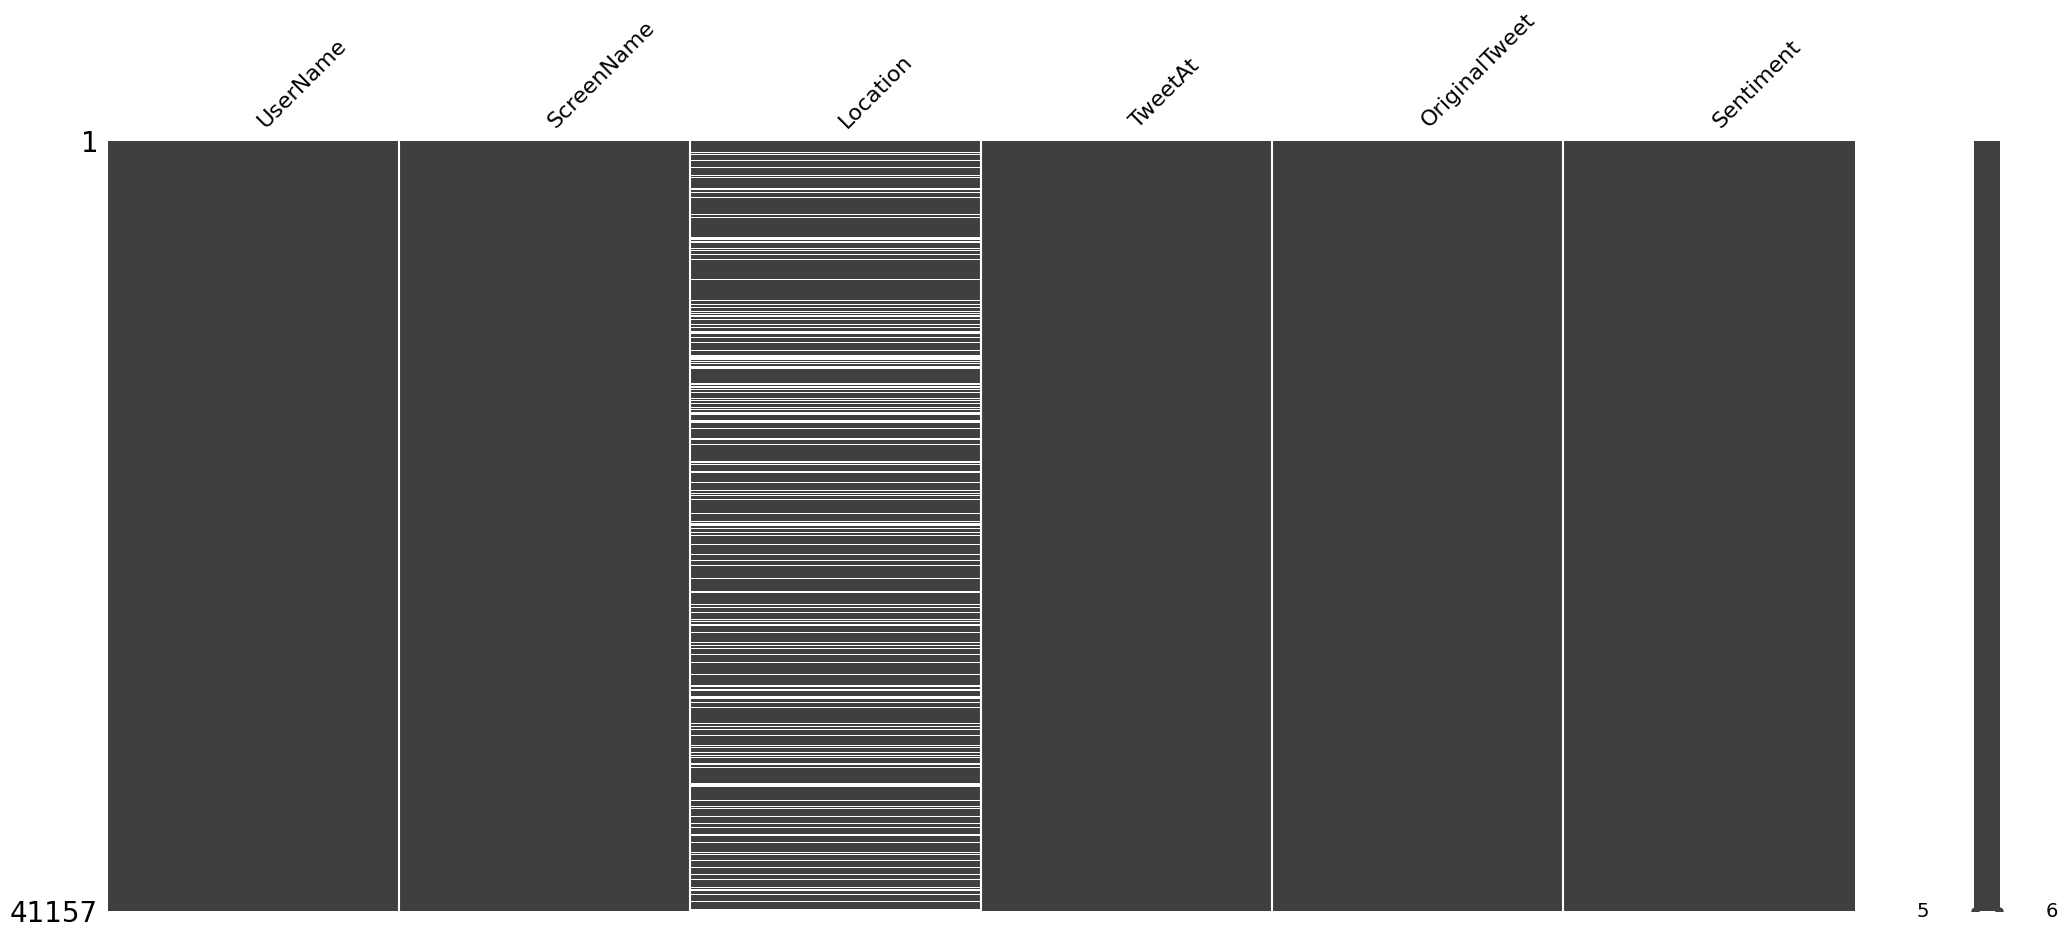

In [9]:
# Visualizing the missing values
import missingno as msno
print(msno.matrix(df))

Axes(0.125,0.11;0.775x0.77)


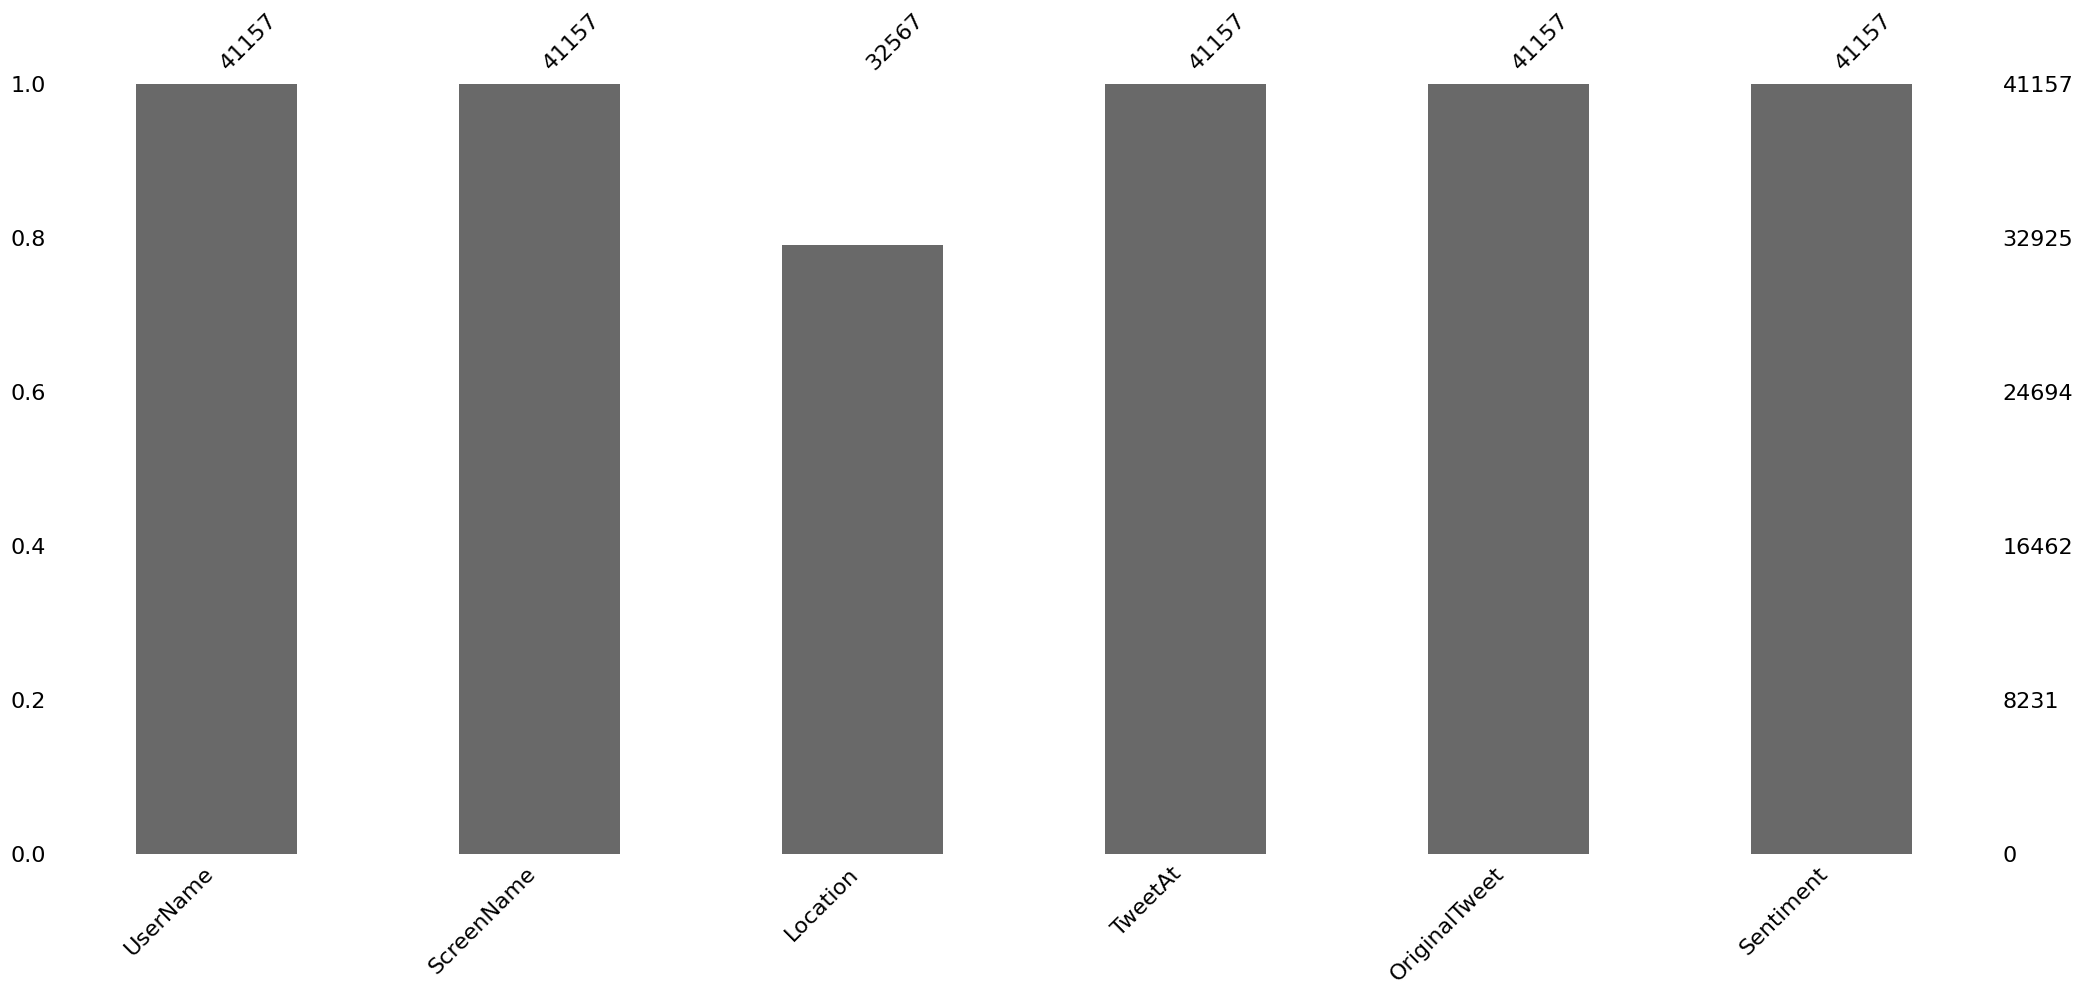

In [10]:
print(msno.bar(df))

### What did you know about your dataset?

1. The Dataset has 41157 rows and 6 columns.
2. The columns are UserName,ScreenName,Location,TweetAt,OriginalTweet and Sentiment.
3. The Location column has 8590 null values whereas the rest of the columns have non null values.
4. No duplicate values are present in the dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


### Variables Description 

1. UserName : Coded Username
2. ScreenName : Coded Screen name
3. Location : Region of Origin
4. TweetAt : Tweet timing
5. OriginalTweet : First tweet in the thread
6. Sentiment : Sentiment of the tweet.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in list(df.columns):
  print(i)
  print(df[i].unique())
  print('length:',len(df[i].unique()))
  print('-'*50)

UserName
[ 3799  3800  3801 ... 44953 44954 44955]
length: 41157
--------------------------------------------------
ScreenName
[48751 48752 48753 ... 89905 89906 89907]
length: 41157
--------------------------------------------------
Location
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']
length: 12221
--------------------------------------------------
TweetAt
['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']
length: 30
--------------------------------------------------
OriginalTweet
['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advi

## ***3. Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df1=df.copy()
df1.isnull().sum()/len(df)*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

Location had 20.8 % null values so those rows has been dropped.

In [15]:
df1.dropna(inplace=True)
df1 = df1.reset_index()

In [16]:
df1.shape

(32567, 7)

Original dataset had 41157 columns now it has 32567 columns after dropping the null values.

In [17]:
#Extracting Day and Month fron TweetAt
#df1['TweetAt'] = pd.to_datetime(df['TweetAt'])
df1['Day']=pd.DatetimeIndex(df1['TweetAt']).day
df1['Month']=pd.DatetimeIndex(df1['TweetAt']).month

In [18]:
#Converting the string into lowercase
df1['Location']=df1['Location'].str.lower()
df1['OriginalTweet']=df1['OriginalTweet'].str.lower()

### What all manipulations have you done and insights you found?

1. Location column had around 21% of null values So those values has been dropped.
2. Created Day and Month as new column from TweetAt column which will provide information regarding the busiest day and month.Since the data present is of a particular year(2020) so year column hasn't been created.
3. Converted Location and OriginalTweet column to lower case to avoid case sensitivity.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Location

In [19]:
loc=df1['Location'].value_counts().sort_values(ascending=False)[:10]

<Axes: xlabel='Location', ylabel='count'>

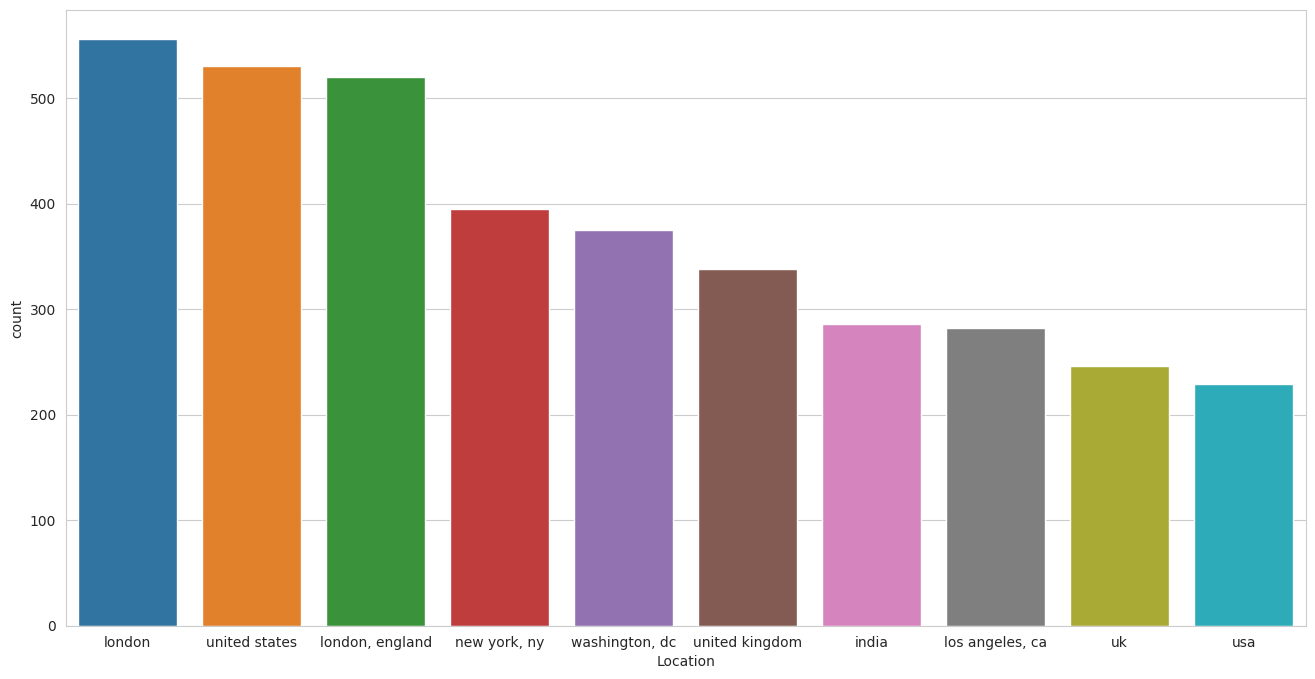

In [20]:
# Chart - 1 visualization code
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.countplot(x='Location',data=df1[df1['Location'].isin(loc.index)],order=loc.index)

##### 1. Why did you pick the specific chart?

To check which location has the highest number of users.

##### 2. What is/are the insight(s) found from the chart?

1. London has the highest active users follwed by United States.
2. India has 8th rank followed by UK and Australia.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll provide the details regarding the active users present in the different regions.The user demands of products in different regions will help in increasing the sales for example which region requires medical aid like mask, sanitizers or other medicines and which regions has high demand for groceries.

#### Chart - 2- Monthly

<Axes: xlabel='Month', ylabel='count'>

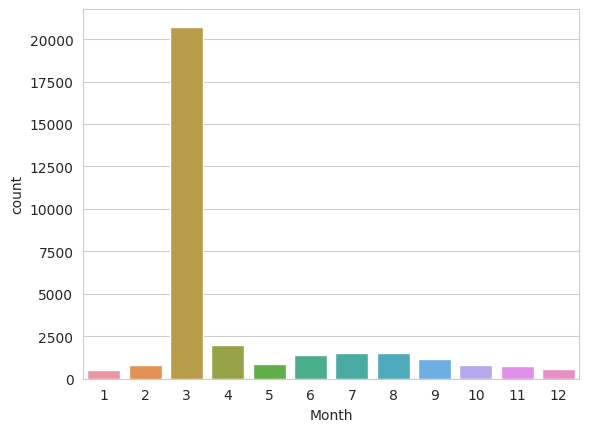

In [21]:
# Chart - 2 visualization code
sns.countplot(data=df1,x='Month')

##### 1. Why did you pick the specific chart?

To know which month was most active.

##### 2. What is/are the insight(s) found from the chart?

1. March has the highest tweets since the covid cases were rising significantly.
2. The rise in June, July and August is because of the increasing cases due to new variant of coronavirus. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll help to know the active months and its respective demands of products based on the tweets.

#### Chart - 3-Sentiments

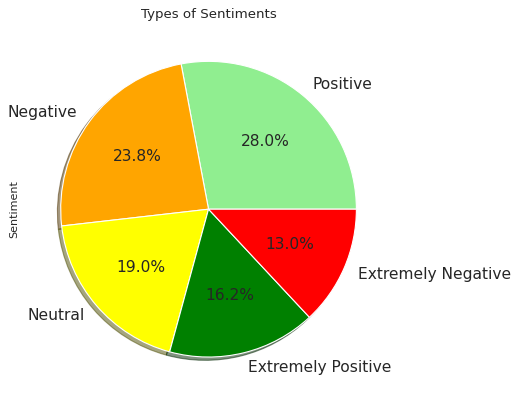

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


In [22]:
# Chart - 3 visualization code
# Plotting the pie chart for sentiment
plt.figure(figsize=(10,7), dpi=80)
df1['Sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = ['lightgreen','orange', 'yellow','green','red'],startangle=360,fontsize=14,shadow=True)
plt.title("Types of Sentiments")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()
#Table
s = df['Sentiment'].value_counts().reset_index()
s.columns = ['Sentiment','count']
s

##### 1. Why did you pick the specific chart?

To know the percentage of each type of sentiment

##### 2. What is/are the insight(s) found from the chart?

1. Positive has the highest percentage i.e 28%.
2. Negative has around 24%
3. Neutral has 19%.
4. Extremely positive has 16.2%.
5. Extremely negative has 13%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the type of sentiment it can be decided what people are preferring and rejecting.

#### Chart - 4-Sentiments Revised

In [23]:
# Chart - 6 visualization code
df1['Sentiment']=df1['Sentiment'].replace(to_replace=["Extremely Positive", "Extremely Negative"],value=["Positive","Negative"])

<Axes: xlabel='Sentiment', ylabel='count'>

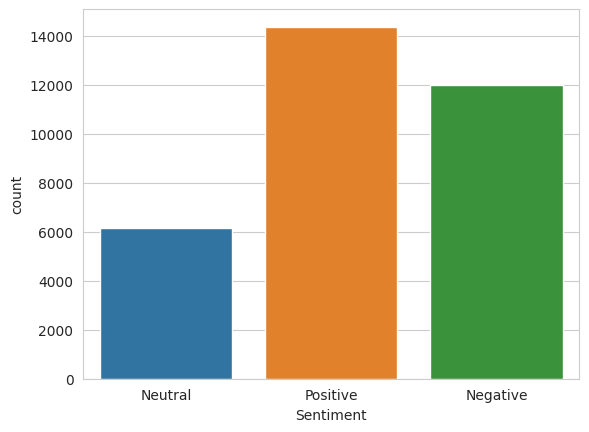

In [24]:
sns.countplot(data=df1,x='Sentiment')

##### 1. Why did you pick the specific chart?

To categorise the sentiment into 3 groups.

##### 2. What is/are the insight(s) found from the chart?

1. There are around 14000 positive tweets.
2. Around 12000 negative tweets.
3. Around 6000 neutral tweets.

#### Chart - 5-Tweet At

<Axes: xlabel='TweetAt'>

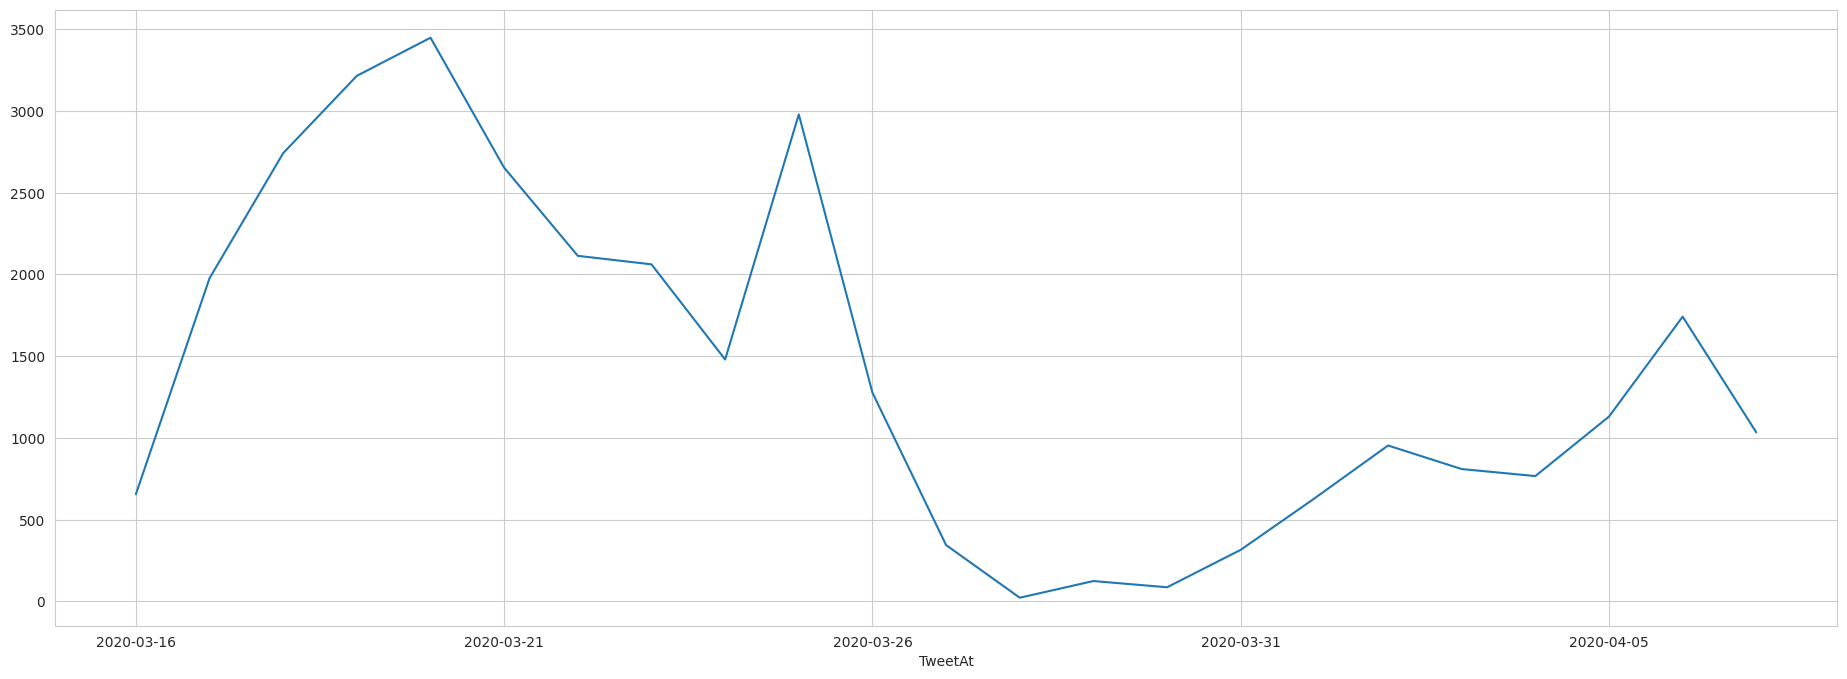

In [25]:
# Chart - 4 visualization code
df1['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')
df1['TweetAt'] = df1['TweetAt'].dt.strftime('%Y-%m-%d')
plt.figure(figsize=(23,8))
d=df1.groupby('TweetAt').count().sort_values(by='TweetAt')['OriginalTweet']
#d.sort_values(by='TweetAt')
d.plot()

##### 1. Why did you pick the specific chart?

To know which day has the most number of tweets.

##### 2. What is/are the insight(s) found from the chart?

1. Tweet started rising from 16/03/2020.
2. Number of Tweets were highest during 19/03/2020 to 20/03/2020.
3. After 25/03/2020 tweets dropped drastically.
4. On 28/03/2020 tweets were the least.
5. After 31/03/2020 tweets started to rose again.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Advertisement during the peak tweets can help in generating revenues for the companies.
2. During the days when tweets were the least it'll affect the Advertising companies.

#### Chart - 6-OriginalTweet

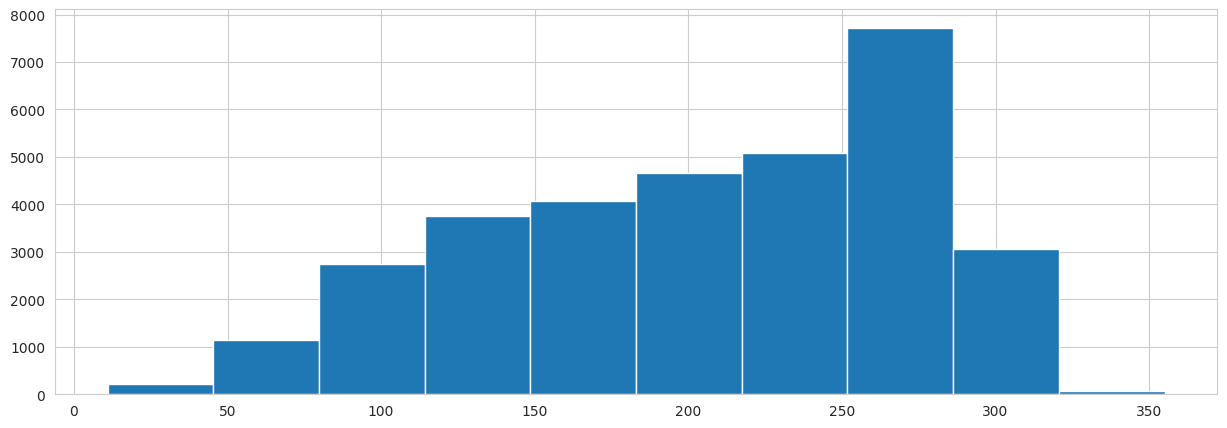

In [26]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))
plt.hist(df1['OriginalTweet'].str.len())
plt.show()

##### 1. Why did you pick the specific chart?

To know under which category of length majority of the tweets falls under.

##### 2. What is/are the insight(s) found from the chart?

1. Number of Tweets under 50 characters are around 200.
2. Majority of the tweets falls under the length of 250-280 characters.
3. Around 3000 tweets have length between 280-320.
4. Number of Tweets with character length more than 320 is approximately 100.


#### Chart - 7-WordCloud- check for overall tweets

In [27]:
# Chart - 7 visualization code
dfp=df1[df1['Sentiment']=='Positive']
dfn=df1[df1['Sentiment']=='Negative']

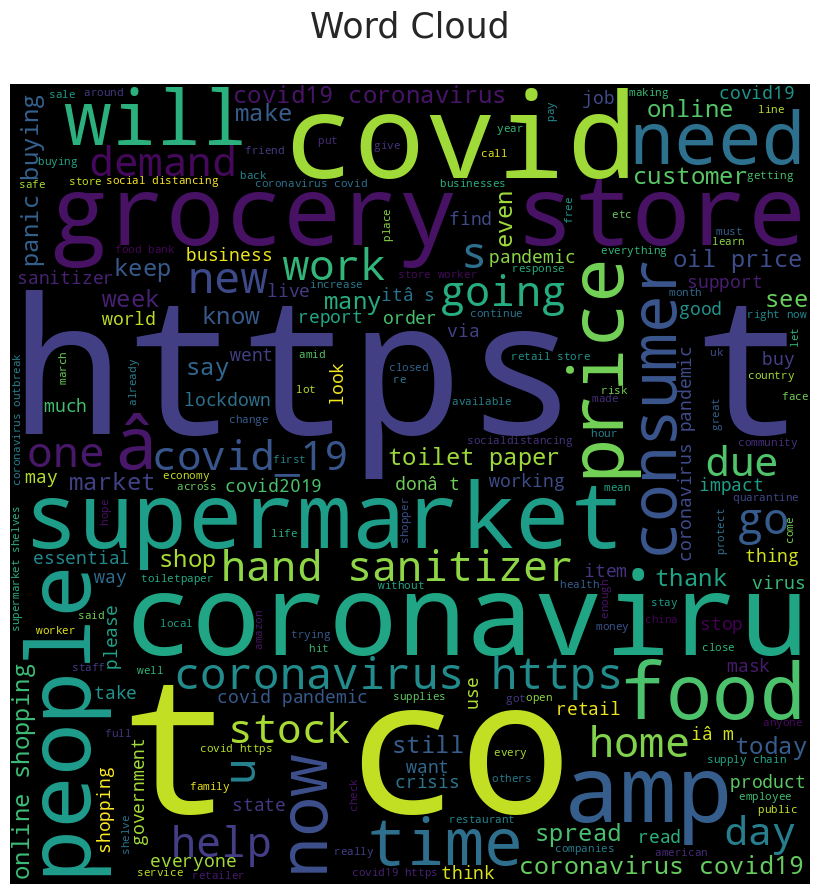

In [96]:
#Word Cloud 
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df1.OriginalTweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
  # plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud\n',fontsize=25)
plt.show()

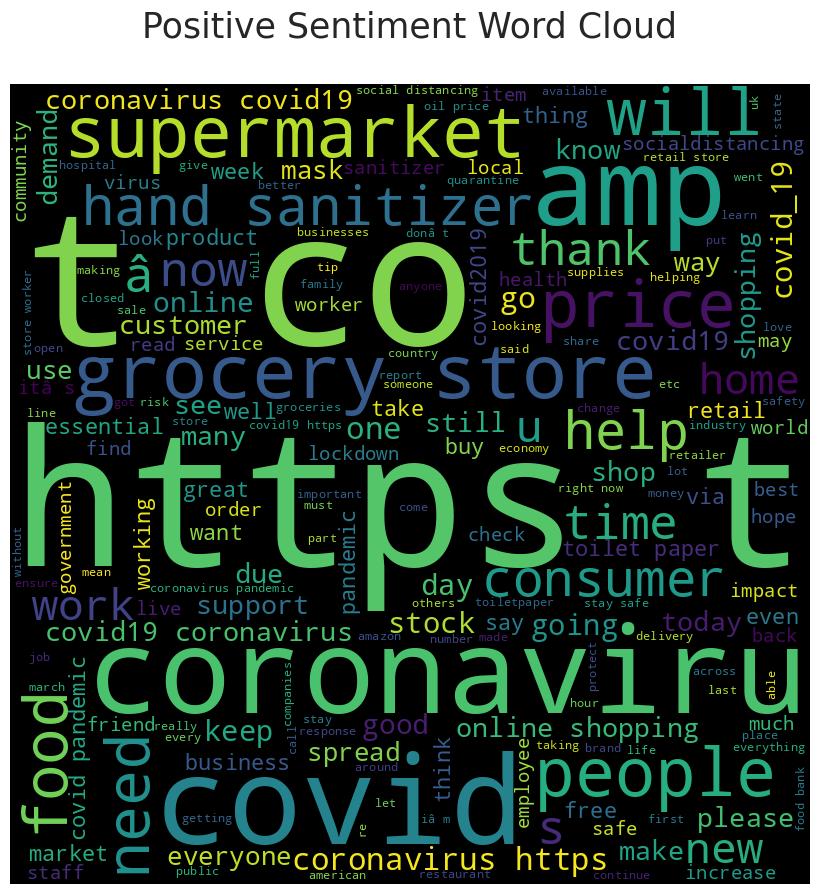

In [28]:
#Word Cloud for positive sentiments
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in dfp.OriginalTweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
  # plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Positive Sentiment Word Cloud\n',fontsize=25)
plt.show()

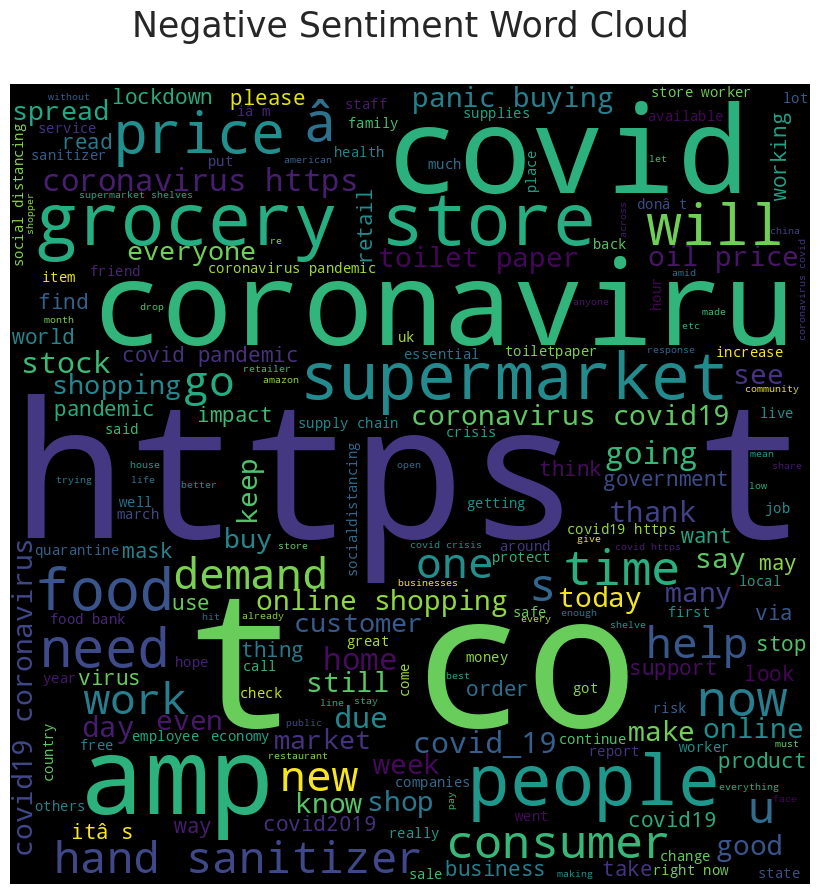

In [29]:
# Word count for negative sentiment
for val in dfn.OriginalTweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Negative Sentiment Word Cloud\n',fontsize=25)
plt.show()

##### 1. Why did you pick the specific chart?

To know which of the words are prominent.

##### 2. What is/are the insight(s) found from the chart?

Words that are more prominent are:

1. Covid
2. Coronavirus
3. Supermarket
4. Grocery
5. Sanitizer
6. Food and etc. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insight from this is extremely beneficial for the business.
1. Demand of hand sanitizer and mask shoots up very high causing  skewflation.Ecommerce business increased drastically.People prefered buying online rather than going to the stores.
2. Offline business affected terribly as the sales went down because less customer preferred going out to buy.


#### Chart - 8 - Correlation Heatmap

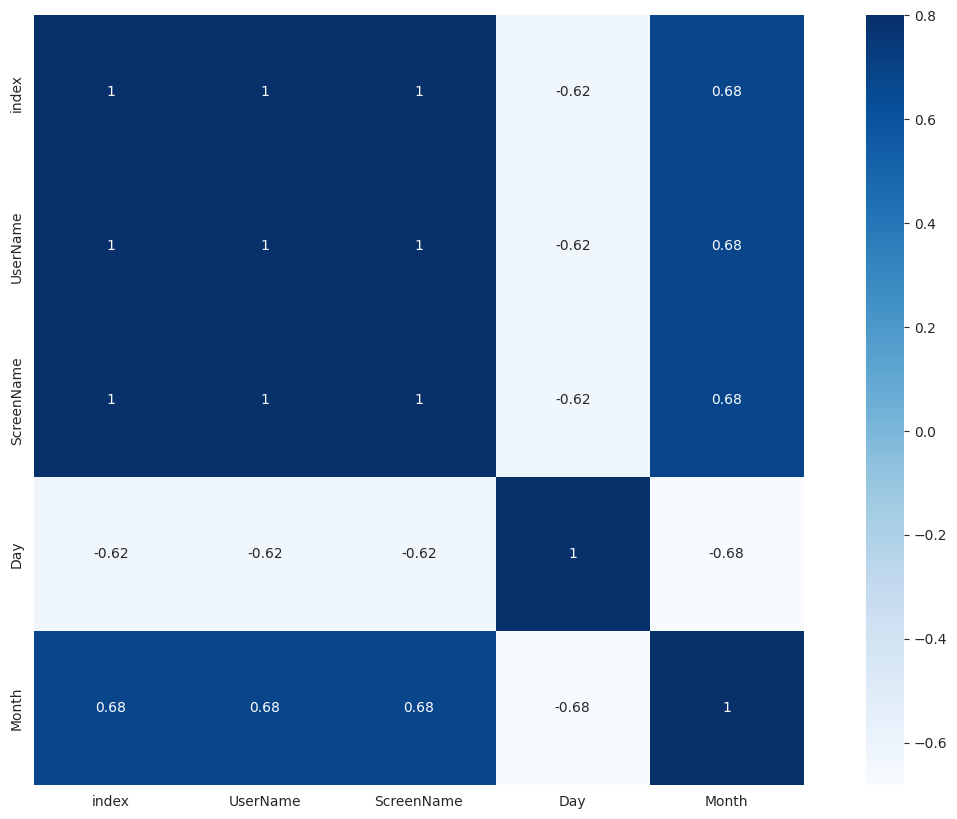

In [30]:
# Correlation Heatmap visualization code
#correlation matrix
corrmat = df1.corr()
h, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(corrmat, vmax=.8, square=True , cmap="Blues",annot=True);

##### 1. Why did you pick the specific chart?

To find the relation between different features.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### **EDA Conclusion**:
1. London has the highest number of active users follwed by United States and India is at 8th position.
2. March month has the highest number of tweet since the covid cases increased drastically at that time.
3. Out of all the tweets 44.2% were positive while 36.8% were negative tweets.
4. Majority of the tweets have length between 250-280 characters.
5. Words which occur frequently are Covid,Coronavirus,Supermarket,Grocery,Sanitizer.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
#Location column had null values which were dropped above.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Basic dropna is used.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

Converting words like it'll, would've etc into it will, would have etc.

In [32]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.7 MB/s eta 0:00:00


In [33]:
# Expand Contraction
import contractions
def cont(x):
  return contractions.fix(x)

In [34]:
df1['Mod_Tweet']=df1['OriginalTweet'].apply(cont)

#### 2. Lower Casing

Converting words into lower case so case sensitivity can be treated and word redundancy can be removed.

In [35]:
# Lower Casing
df1['Mod_Tweet']=df1["Mod_Tweet"].str.lower()

#### 3. Removing URLs & Removing words and digits contain digits.

Removing the urls because each url is unique and also it won't provide any meaning to the sentence.Digits and word containing digits have no meaning and serves no purpose either.

In [36]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_url(text_data):
  text=re.sub(r"http\S+", "", text_data)
  return remove_numbers(text)
# function to remove numbers
def remove_numbers(text):
  # define the pattern to keep
  pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
  return re.sub(pattern, '', text)

In [37]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(remove_url)

#### 4. Removing Punctuations

Punctuations serves no purpose in machine learning So it's better to remove them for faster processing.

In [38]:
# Remove Punctuations
import string
string.punctuation
punct_list = list(string.punctuation)
def remove_punctuation(text):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    #return remove_special_characters(text)
    return remove_special_characters(text.strip())
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\']' 
    return re.sub(pat, ' ', text)

In [39]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(remove_punctuation)

In [40]:
df1['Backup']=df1['Mod_Tweet'].copy()

#### 5. Removing Stopwords & Removing White spaces

Stopwords occur way to often in a sentence and it also doesn't have too much importance.Removing it inorder to get the important words and for faster processing.

In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
# Remove Stopwords and White spaces
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    #White space in joined with the string so there is not need to check for extra white spaces 
    return " ".join([word for word in str(text).split() if word not in stop_words]) 

In [43]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(remove_stopwords)

In [44]:
# Remove White spaces
#The White spaces situation is taken care in the above function
#another function to check for white spaces
'''def remove_whitespaces(text):
  return re.sub(' +', ' ', text)'''

"def remove_whitespaces(text):\n  return re.sub(' +', ' ', text)"

#### 7. Tokenization

It'll convert sentences into smaller units

In [45]:
#Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def token(y):
  return word_tokenize(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [46]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(token)

#### 8. Text Normalization

It'll reduce the words to its base form like caring into care.

In [47]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [48]:
df1['Mod_Tweet'][0]

['menyrbie', 'phil', 'gahan', 'chrisitv']

In [49]:
# Stemming
#function for stemming
def stemming(text): 
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [50]:
df1['Mod_Tweet']=df1['Mod_Tweet'].apply(stemming)

##### Which text normalization technique have you used and why?

Stemming is used here for normalization.Since we are providing data to the machine it doesn't need to understand the meaning of the word.It'll use the root word and based on the training it'll will gives us the sentiment related to it.Also since we are dealing with a large amount of data Stemming will be quicker.


#### 10. Text Vectorization

It'll convert text into numerical representation.

In [51]:
#TF/IDF Vectorization is used.Through pipeline it is used with different models below.

##### Which text vectorization technique have you used and why?

1. TF-IDF is better because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.
2. Words occuring more often will have less weightage which will helps in the reduction of unnecessary words.


## ***6. ML Model Implementation***

### ML Model - 1- Logistic Regression(Using TF/IDF)

In [52]:
X=df1.Mod_Tweet
y=df1.Sentiment
# Fit the Algorithm
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer',tvec),('classifier',LR)])
model1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [53]:
# model prediction
y_pred = model1.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.80      0.81      0.80      2479
     Neutral       0.73      0.58      0.65      1222
    Positive       0.79      0.85      0.82      2813

    accuracy                           0.78      6514
   macro avg       0.77      0.75      0.76      6514
weighted avg       0.78      0.78      0.78      6514



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart
print('Accuracy :' ,accuracy_score(y_test,y_pred))
print('Precision :', precision_score(y_test,y_pred, average='weighted'))
print('Recall :', recall_score(y_test,y_pred,average='weighted'))

Accuracy : 0.7844642308873196
Precision : 0.7821476321938998
Recall : 0.7844642308873196


[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

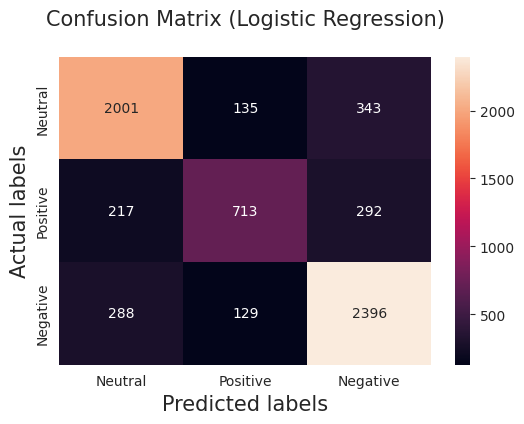

In [56]:
#Plotting Confussion matrix
labels=['Neutral','Positive','Negative']
cf1= (confusion_matrix(y_test,y_pred))
plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression)\n', fontsize=15)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Initalizing the model
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[10, 1.0, 0.1, 0.01])
tvec = TfidfVectorizer()
#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(LR,parameters,cv=15)

model = Pipeline([('vectorizer',tvec),('classifier',logreg_Gcv)])
# Fit the Algorithm
model.fit(X_train, y_train)
# Predict on the model
y2_pred = model.predict(X_test)

In [58]:
print('Accuracy :' ,accuracy_score(y_test,y2_pred))
print('Precision :', precision_score(y_test,y2_pred, average='weighted'))
print('Recall :', recall_score(y_test,y2_pred,average='weighted'))

Accuracy : 0.7849247774025176
Precision : 0.7833195647559705
Recall : 0.7849247774025176


[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

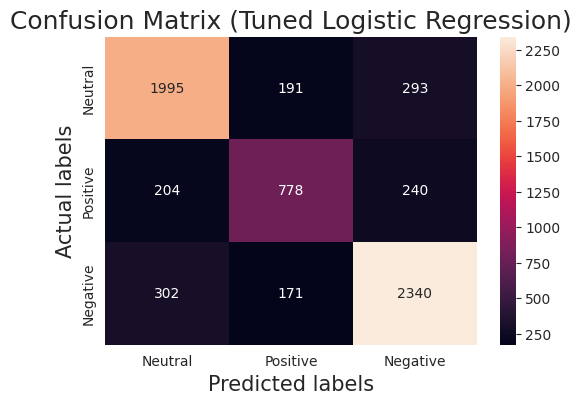

In [59]:
#Plotting Confussion matrix
cf= (confusion_matrix(y_test,y2_pred))
plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cf, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Tuned Logistic Regression)', fontsize=18)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV uses each and every combination to build and evaluate the model performance.Since the dependent variable has only 3 unique values its better to use GridSeachCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [60]:
m={'Model1(LR)':[accuracy_score(y_test,y_pred),precision_score(y_test,y_pred, average='weighted'),recall_score(y_test,y_pred,average='weighted')],
    'Model1(LR)-Tuned':[accuracy_score(y_test,y2_pred),precision_score(y_test,y2_pred, average='weighted'),recall_score(y_test,y2_pred,average='weighted')]}
res=pd.DataFrame(m,index=['Accuracy','Precision','Recall'])
res['Difference']=res['Model1(LR)-Tuned']-res['Model1(LR)']
res

,Model1(LR),Model1(LR)-Tuned,Difference
Accuracy,0.784464,0.784925,0.000461
Precision,0.782148,0.783320,0.001172
Recall,0.784464,0.784925,0.000461


1. Accuracy Increased by 0.0461%
2. Precision increased by 0.1172%
3. Recall increased by  0.0461%

### ML Model - 2- Decision Tree

In [61]:
# ML Model - 2 Implementation
DT=DecisionTreeClassifier()
model2 = Pipeline([('vectorizer',tvec),('classifier',DT)])

# Fit the Algorithm
model2.fit(X_train, y_train)
# Predict on the model
y_pred2 = model2.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

    Negative       0.64      0.60      0.62      2479
     Neutral       0.49      0.57      0.53      1222
    Positive       0.68      0.67      0.68      2813

    accuracy                           0.63      6514
   macro avg       0.60      0.61      0.61      6514
weighted avg       0.63      0.63      0.63      6514



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart
print('Accuracy :' ,accuracy_score(y_test,y_pred2))
print('Precision :', precision_score(y_test,y_pred2, average='weighted'))
print('Recall :', recall_score(y_test,y_pred2,average='weighted'))

Accuracy : 0.6255756831439976
Precision : 0.6314020131209857
Recall : 0.6255756831439976


[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

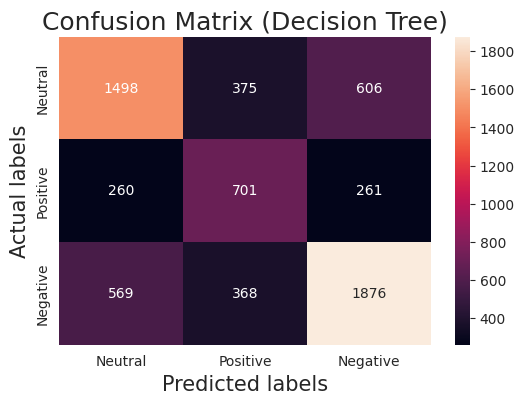

In [64]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,y_pred2))
plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree)', fontsize=18)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model - 3-Support Vector Machine

In [65]:
# ML Model - 3 Implementation
from sklearn.svm import SVC

svm = SVC()

model3 = Pipeline([('vectorizer',tvec),('classifier',svm)])

# Fit the Algorithm
model3.fit(X_train,y_train)
# Predict on the model
y_pred3 = model3.predict(X_test)

In [66]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

    Negative       0.79      0.80      0.79      2479
     Neutral       0.75      0.55      0.64      1222
    Positive       0.78      0.86      0.82      2813

    accuracy                           0.78      6514
   macro avg       0.77      0.74      0.75      6514
weighted avg       0.78      0.78      0.77      6514



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart
print('Accuracy :' ,accuracy_score(y_test,y_pred3))
print('Precision :', precision_score(y_test,y_pred3, average='weighted'))
print('Recall :', recall_score(y_test,y_pred3,average='weighted'))

Accuracy : 0.7781700951796131
Precision : 0.7764830857394536
Recall : 0.7781700951796131


[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

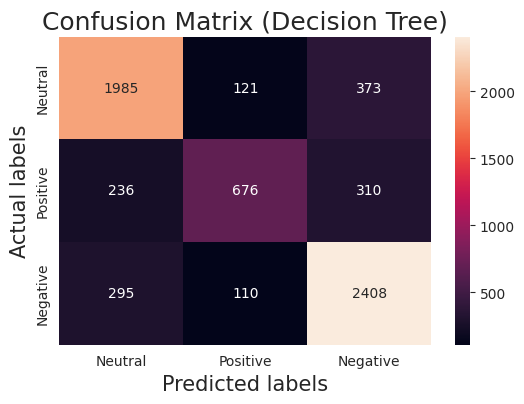

In [68]:
#Plotting Confussion matrix
cf3= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree)', fontsize=18)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model - 4-XG-Boost classifier

In [69]:
# ML Model - 3 Implementation
# Initializing model
xgb=DecisionTreeClassifier()
model4 = Pipeline([('vectorizer',tvec),('classifier',xgb)])

# Fit the Algorithm
model4.fit(X_train,y_train)
# Predict on the model
y_pred4=model4.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

    Negative       0.65      0.61      0.63      2479
     Neutral       0.49      0.57      0.52      1222
    Positive       0.69      0.68      0.69      2813

    accuracy                           0.63      6514
   macro avg       0.61      0.62      0.61      6514
weighted avg       0.64      0.63      0.63      6514



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart
print('Accuracy :' ,accuracy_score(y_test,y_pred4))
print('Precision :', precision_score(y_test,y_pred4, average='weighted'))
print('Recall :', recall_score(y_test,y_pred4,average='weighted'))

Accuracy : 0.63202333435677
Precision : 0.6369770877472822
Recall : 0.63202333435677


[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

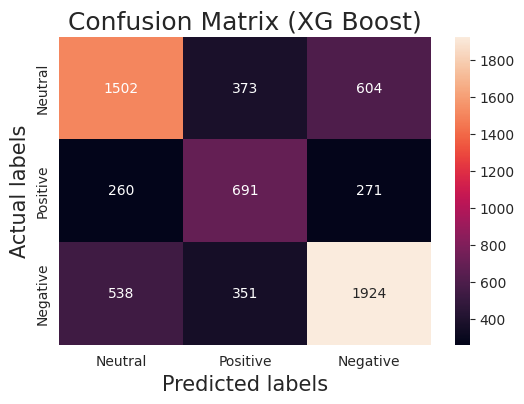

In [72]:
#Plotting Confussion matrix
cf4= (confusion_matrix(y_test,y_pred4))
plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (XG Boost)', fontsize=18)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model - 5-Random Forest Classifier

In [73]:
# ML Model - 3 Implementation
# Initializing model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model5 = Pipeline([('vectorizer',tvec),('classifier',rf)])

# Fit the Algorithm
model5.fit(X_train,y_train)
# Predict on the model
y_pred5=model5.predict(X_test)

In [74]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

    Negative       0.78      0.73      0.75      2479
     Neutral       0.67      0.62      0.65      1222
    Positive       0.75      0.82      0.78      2813

    accuracy                           0.75      6514
   macro avg       0.73      0.72      0.73      6514
weighted avg       0.75      0.75      0.75      6514



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart
print('Accuracy :' ,accuracy_score(y_test,y_pred5))
print('Precision :',precision_score(y_test,y_pred5, average='weighted'))
print('Recall :',recall_score(y_test,y_pred5,average='weighted'))

Accuracy : 0.7465459011360147
Precision : 0.7464698422456024
Recall : 0.7465459011360147


[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

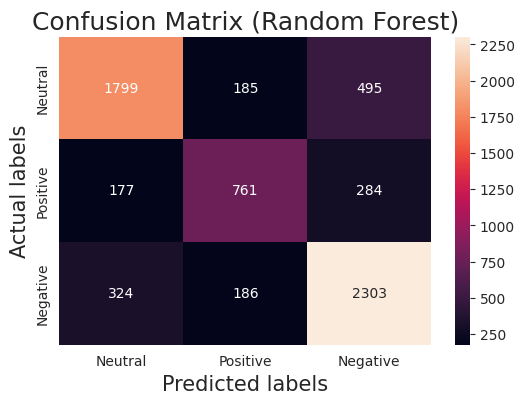

In [76]:
#Plotting Confussion matrix
cf5= (confusion_matrix(y_test,y_pred5))
plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest)', fontsize=18)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [77]:
m1={'Model1(LR)':[accuracy_score(y_test,y_pred),precision_score(y_test,y_pred, average='weighted'),recall_score(y_test,y_pred,average='weighted')],
    'Model1(LR)-Tuned':[accuracy_score(y_test,y2_pred),precision_score(y_test,y2_pred, average='weighted'),recall_score(y_test,y2_pred,average='weighted')],
    'Model2(DT)':[accuracy_score(y_test,y_pred2),precision_score(y_test,y_pred2, average='weighted'),recall_score(y_test,y_pred2,average='weighted')],
    'Model3(SVM)':[accuracy_score(y_test,y_pred3),precision_score(y_test,y_pred3, average='weighted'),recall_score(y_test,y_pred3,average='weighted')],
    'Model4(XG)':[accuracy_score(y_test,y_pred4),precision_score(y_test,y_pred4, average='weighted'),recall_score(y_test,y_pred4,average='weighted')],
    'Model5(RF)':[accuracy_score(y_test,y_pred5),precision_score(y_test,y_pred5, average='weighted'),recall_score(y_test,y_pred5,average='weighted')]}
res1=pd.DataFrame(m1,index=['Accuracy','Precision','Recall'])
res1

,Model1(LR),Model1(LR)-Tuned,Model2(DT),Model3(SVM),Model4(XG),Model5(RF)
Accuracy,0.784464,0.784925,0.625576,0.778170,0.632023,0.746546
Precision,0.782148,0.783320,0.631402,0.776483,0.636977,0.746470
Recall,0.784464,0.784925,0.625576,0.778170,0.632023,0.746546


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy,Precision and Recall are used for evaluation metrics.
1. Accuracy will tell how many times the model was correct overall.
2. Precision will tell how good the model is at predicting a specific category.
3. Recall will tell how many times the model was able to detect a specific category.
4. Combining all the 3 will provide a better result.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

5 models were tested which are:
1. Logistic Regression
2. Decision Tree
3. Support Vector Machine
4. XG Boost Classifier
5. Random Forest

Out of the above models Logistic Regression provided the best score of accuracy,precision and recall.Tuning the model increased the score even further.So among the tested models Tuned Logistic Regression turned out to be the best suited for the given dataset. 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Tuned Logistic Regression Model is used and the only important feature that we considered is OriginalTweet.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [88]:
# Save the File
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [95]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(['I had a good day','I had a normal day','I had a bad day'])

array(['Positive', 'Neutral', 'Negative'], dtype=object)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Five Models have been tested -
1. Logistics Regression: 
  Accuracy = 78.4464 %, Precision = 78.2148 % , Recall = 78.4464	%.
2. Decision Tree:
 Accuracy = 63.3558 %, Precision = 63.8142 % , Recall = 63.3558	%.
3. Support Vector Machine:
  Accuracy = 77.8170 %, Precision = 77.6483 % , Recall = 77.8170%.
4. XG-Boost:
  Accuracy = 63.1716 %, Precision = 63.7475 % , Recall = 63.1716%.
5. Random Forest:
  Accuracy = 74.2247 %, Precision = 74.2363 % , Recall = 74.2247%.

Since the score of Logistic Regression is bestTuning the Logistic Regression increased the Accuracy to 78.4925 %, Precision to 78.3320	%, Recall to 78.4925 %

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***